In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp
import numpy as np


## The model problem
This is the problem we used to demonstrate the boundary layer technique
$$
\epsilon f'' + f' =2x-1 , \ f(0)=1, \ f(1)=4, \ 0<\epsilon << 1
$$


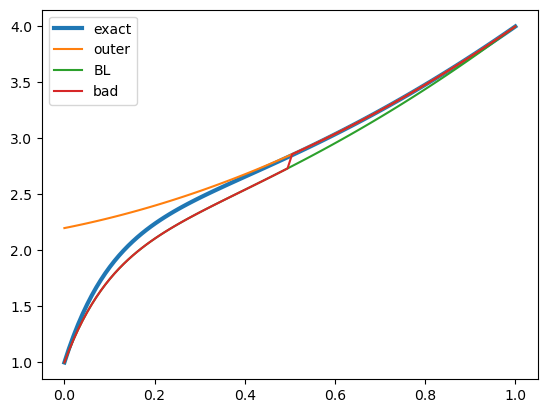

In [7]:
def f_exact(x,epsilon=0.01):
    out=x*x+x+2-np.exp(-x/epsilon)+epsilon*(2*(1-x)-2*np.exp(-x/epsilon))
    return out

def f_out(x,epsilon=0.01):
    out=x*x+x+2+epsilon*2*(1-x)
    return out

def f_BL(x,epsilon=0.01):
    out=x**2+x+2-np.exp(-x/epsilon)
    return out

def f_bad(x,epsilon=0.01,x_match=5):
    out = np.where(x < x_match, f_BL(x, epsilon), f_out(x, epsilon))
    return out


epsilon=0.1
x=np.linspace(0,1,100)


plt.plot(x, f_exact(x, epsilon), label='exact',linewidth=3)
plt.plot(x, f_out(x, epsilon), label='outer')
plt.plot(x, f_BL(x, epsilon), label='BL')
plt.plot(x, f_bad(x, epsilon,x_match=0.5), label='bad')
plt.legend()
#plt.xlim([0,0.03])
#plt.ylim([0.9,4.1])



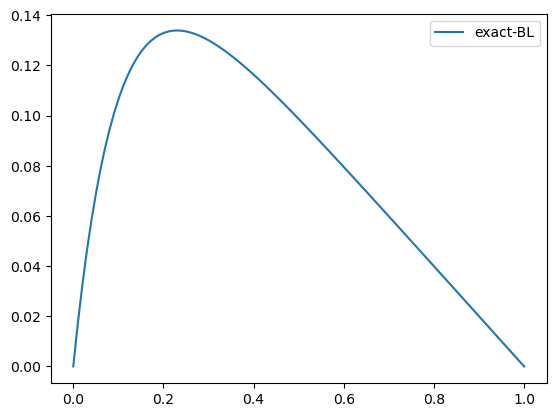

In [8]:
#plt.plot(x,f_exact(x,epsilon)-f_out(x,epsilon),label='exact-outer')
plt.plot(x,f_exact(x,epsilon)-f_BL(x,epsilon),label='exact-BL')
plt.legend()    

## Solving Boundary value problems 

### Shooting techniques

To answer this question, we can frame the problem into a boundary value problem for a second-order ODE. The ODE is:
$$
\displaystyle\frac{𝑑^2𝑦}{𝑑𝑡^2}=−𝑔
$$
with the two boundary conditions are: 𝑦(0)=0 and 𝑦(5)=50. And we want to answer the question, what’s the 𝑦′(0) at the launching?

This is a quite simple question, we can solve it analytically easily, with the correct answer 𝑦′(0)=34.5. Now let’s solve it using the shooting method. First, we will reduce the order of the function, the second-order ODE becomes:
$$
\begin{array}{rcl}
\displaystyle\frac{𝑑𝑦}{𝑑𝑡}&=&𝑣\\ \\
\displaystyle\frac{𝑑v}{𝑑𝑡}&=&−𝑔
\end{array}
$$

### Shooting technique

Make it a Initial value problem, guessing the initial v(0).  

Define the rhs function

In [9]:
F = lambda t, s: \
  np.dot(np.array([[0,1],[0,-9.8/s[1]]]),s)


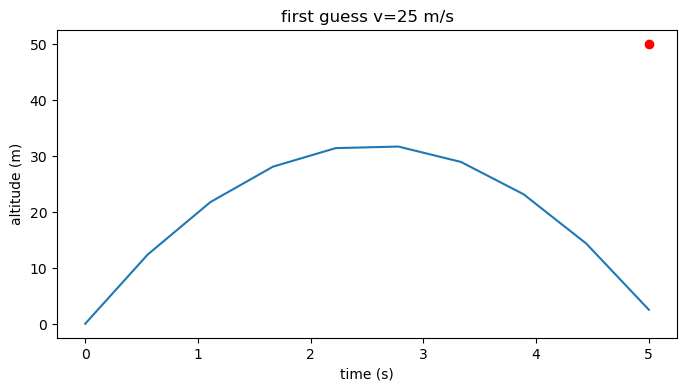

In [17]:
t_span = np.linspace(0, 5, 100)
y0 = 0
v0 = 25
t_eval = np.linspace(0, 5, 10)
sol = solve_ivp(F, [0, 5], \
                [y0, v0], t_eval = t_eval)

plt.figure(figsize = (8, 4))
plt.plot(sol.t, sol.y[0])
plt.plot(5, 50, 'ro')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.title(f'first guess v={v0} m/s')
plt.show()

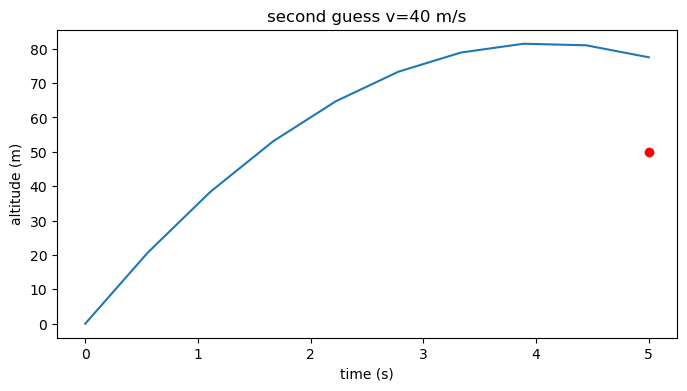

In [16]:
v0 = 40
sol = solve_ivp(F, [0, 5], \
            [y0, v0], t_eval = t_eval)

plt.figure(figsize = (8, 4))
plt.plot(sol.t, sol.y[0])
plt.plot(5, 50, 'ro')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.title(f'second guess v={v0} m/s')
plt.show()

Make this into a function with the guess of v[0] as input

In [40]:
def solve_ode_shoot(v0, plot=True):
    t_span = np.linspace(0, 5, 100)
    y0 = 0
    t_eval = np.linspace(0, 5, 10)
    sol = solve_ivp(F, [0, 5], [y0, v0], t_eval=t_eval)
    
    if plot:
        plt.figure(figsize=(8, 4))
        plt.plot(sol.t, sol.y[0])
        plt.plot(5, 50, 'ro')
        plt.xlabel('time (s)')
        plt.ylabel('altitude (m)')
        plt.title(f'first guess v={v0} m/s')
        plt.show()
    else:
        return sol.y[0][-1]
    


Try a few new values, v[0]=25 undershoot, v[0]=40 overshoot, what will be the next natural guess? 

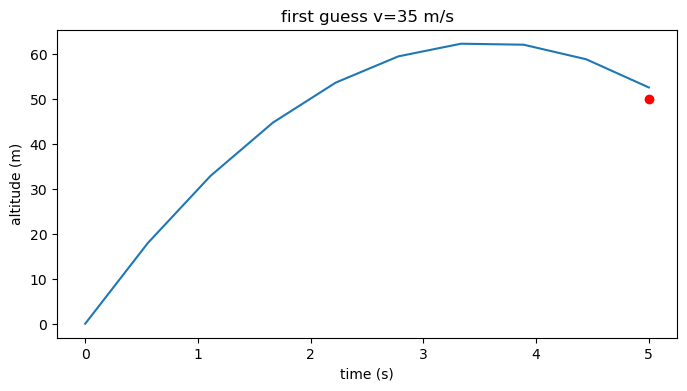

52.50000000000005


In [41]:
solve_ode_shoot(v0=35, plot=True)
print(solve_ode_shoot(v0=35, plot=False))


In [42]:
v_old=1
v_new=100
print(f'v(0)= {v_old} gives {solve_ode_shoot(v_old, plot=False)}')
print(f'v(0)= {v_new} gives {solve_ode_shoot(v_new, plot=False)}')
v=0.5*(v_old+v_new)
print(f'v(0)= {v} gives {solve_ode_shoot(v, plot=False)}')


v(0)= 1 gives -117.49999999999986
v(0)= 100 gives 377.5
v(0)= 50.5 gives 130.00000000000006


v(0)= 50.5 gives 130.00000000000006
v(0)= 25.75 gives 6.250000000000076
v(0)= 38.125 gives 68.12500000000001
v(0)= 31.9375 gives 37.18750000000007
v(0)= 35.03125 gives 52.65625000000005
v(0)= 33.484375 gives 44.92187500000005
v(0)= 34.2578125 gives 48.78906250000013
v(0)= 34.64453125 gives 50.72265625000003
v(0)= 34.451171875 gives 49.75585937500011
v(0)= 34.5478515625 gives 50.239257812500114
v(0)= 34.49951171875 gives 49.997558593750064
v(0)= 34.523681640625 gives 50.118408203125135
v(0)= 34.5115966796875 gives 50.05798339843758
v(0)= 34.50555419921875 gives 50.02777099609385
v(0)= 34.502532958984375 gives 50.01266479492197
v(0)= 34.50102233886719 gives 50.00511169433601
v(0)= 34.500267028808594 gives 50.00133514404304
v(0)= 34.4998893737793 gives 49.999446868896555
Converged to v(0) = 34.4998893737793 after 17 iterations


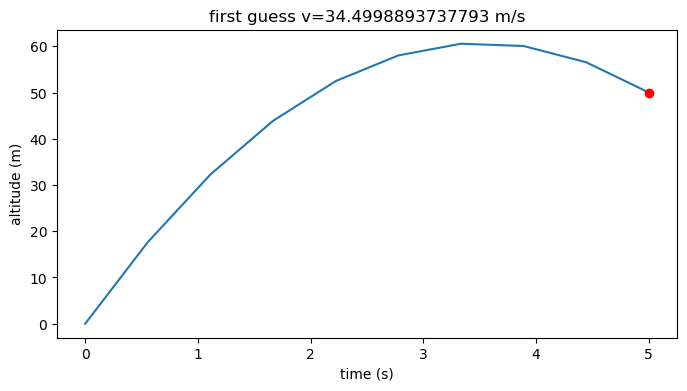

In [47]:
tolerance = 1e-3
max_iterations = 100
target_value = 50
iteration = 0
v_old=1
v_new=100

while iteration < max_iterations:
    v_mid = 0.5 * (v_old + v_new)
    result = solve_ode_shoot(v_mid, plot=False)
    print(f'v(0)= {v_mid} gives {result}')
    if abs(result - target_value) < tolerance:
        print(f'Converged to v(0) = {v_mid} after {iteration} iterations')
        solve_ode_shoot(v_mid, plot=True)
        break
    
    if (result - target_value) * (solve_ode_shoot(v_old, plot=False) - target_value) < 0:
        v_new = v_mid
    else:
        v_old = v_mid
    
    iteration += 1

if iteration == max_iterations:
    print(f'Did not converge after {max_iterations} iterations')

Can be used by using fsolve in scipy.optimize

In [48]:



y0 = [0, 40]  # Initial condition as a list of numerical values
t_eval = np.linspace(0, 5, 100)

def objective(v0):
    sol = solve_ivp(F, [0, 5], \
            [y0[0], v0[0]], t_eval = t_eval)
    y = sol.y[0]
    return y[-1] - 50

v0, = fsolve(objective, 10)
print(v0)

34.499999999999986


### Finite difference method
The differential equation is enforced only at the grid points, and the first and second derivatives are:
$$ 
\begin{array}{rcl} 
\displaystyle\frac{dy}{𝑑𝑥}&=&\displaystyle\frac{𝑦_{𝑖+1}−𝑦_{𝑖−1}}{2ℎ}\\ \\
\displaystyle\frac{d^2y}{𝑑x^2}&=&\displaystyle\frac{𝑦_{𝑖−1}−2𝑦_𝑖+𝑦_{𝑖+1}}{ℎ^2}
\end{array}
$$

Since the time interval is $x\in[0,5]$ using N grid points and the finite difference approximated derivatives, we have
$$ 
\begin{array}{l} 
𝑦_0=0 \\ \\
𝑦_{𝑖−1}−2𝑦_𝑖+𝑦_{𝑖+1}=−𝑔ℎ^2, \ \ 𝑖=1,2,...,𝑛−1 \\ \\
𝑦_{n}=50
\end{array}
$$
with $h=5/(N-1)$.

In matrix notation:
$$
\begin{bmatrix}
1 & 0 & 0 & \cdots & 0 & 0 & 0 \\
1 & -2 & 1 & \cdots & 0 & 0 & 0 \\
0 & 1 & -2 & 1 & \cdots & 0 & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots \\
0 & 0 & 0 & \cdots & 1 & -2 & 1 \\
0 & 0 & 0 & \cdots & 0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
y_0 \\
y_1 \\
y_2 \\
\vdots \\
y_{N-2} \\
y_{N-1}
\end{bmatrix}
=
\begin{bmatrix}
0 \\
-gh^2 \\
-gh^2 \\
\vdots \\
-gh^2 \\
50
\end{bmatrix}
$$

This can be solved using our expertise in linear algebra.

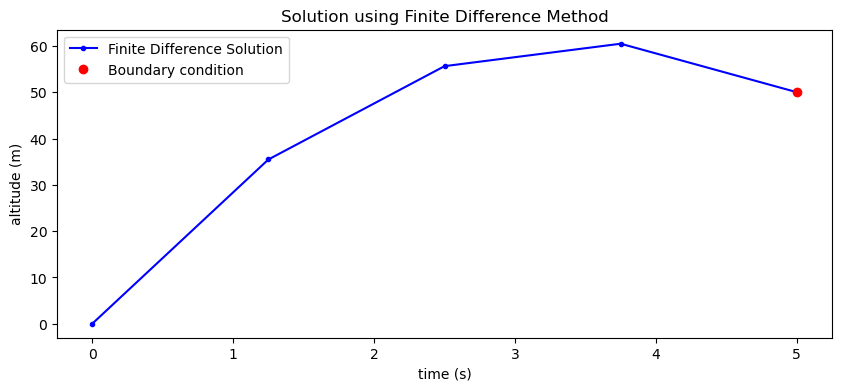

In [67]:
# Define the parameters
L = 5  # Length of the domain
N = 5  # Number of grid points
dx = L / (N - 1)  # Grid spacing
g = 9.8  # Acceleration due to gravity

# Define the grid
x = np.linspace(0, L, N)

# Define the boundary conditions
y0 = 0
yL = 50

# Initialize the solution array
y = np.zeros(N)

# Set the boundary conditions
y[0] = y0
y[-1] = yL

# Construct the coefficient matrix and the right-hand side vector
A = np.zeros((N, N))
b = np.zeros(N)

# Fill the coefficient matrix and the right-hand side vector
for i in range(1, N-1):
    A[i, i-1] = 1 
    A[i, i] = -2 
    A[i, i+1] = 1 
    b[i] = -g*dx**2

# Apply the boundary conditions to the coefficient matrix and the right-hand side vector
A[0, 0] = 1
A[-1, -1] = 1
b[0] = y0
b[-1] = yL

# Solve the system of linear equations
y = np.linalg.solve(A, b)

# Plot the solution
plt.figure(figsize=(10, 4))
plt.plot(x, y, 'b.-',label='Finite Difference Solution')
plt.plot(5, 50, 'ro', label='Boundary condition')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.legend()
plt.title('Solution using Finite Difference Method')
plt.show()

Change the number of grid points, what do you see?

### Using scipys solve_bvp

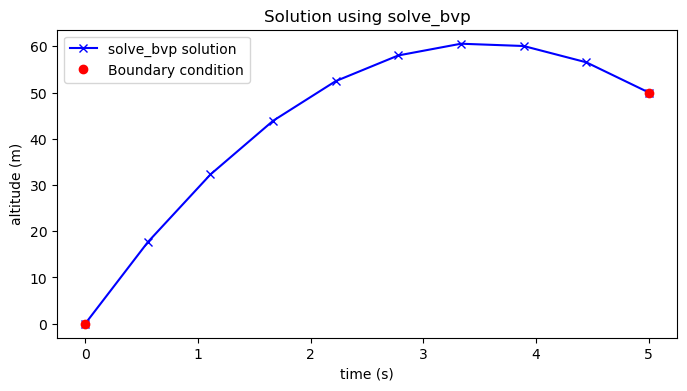

In [58]:
from scipy.integrate import solve_bvp

# Define the differential equations
def fun(t, y):
    return np.vstack((y[1], -9.8 * np.ones_like(y[0])))

# Define the boundary conditions
def bc(ya, yb):
    return np.array([ya[0], yb[0] - 50])

# Initial guess for the solution
t_guess = np.linspace(0, 5, 10)
y_guess = np.zeros((2, t_guess.size))
y_guess[1] = 4.5  # Initial guess for y'

# Solve the BVP
sol_bvp = solve_bvp(fun, bc, t_guess, y_guess)

# Plot the solution
plt.figure(figsize=(8, 4))
plt.plot(sol_bvp.x, sol_bvp.y[0], 'bx-',label='solve_bvp solution')
plt.plot(5, 50, 'ro', label='Boundary condition')
plt.plot(0, 0, 'ro')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.legend()
plt.title('Solution using solve_bvp')
plt.show()

## Try this on our model problem. 
$$
\epsilon f'' + f' =2x-1 , \ f(0)=1, \ f(1)=4, \ 0<\epsilon << 1
$$

with exact solution
$$
f_{ex}(x)=x^2+x+2-e^{-x/\epsilon}+\epsilon (2 (1-x)-2 e^{-x/\epsilon})
$$


In [59]:
def f_exact(x,epsilon=0.01):
    out=x*x+x+2-np.exp(-x/epsilon)+epsilon*(2*(1-x)-2*np.exp(-x/epsilon))
    return out

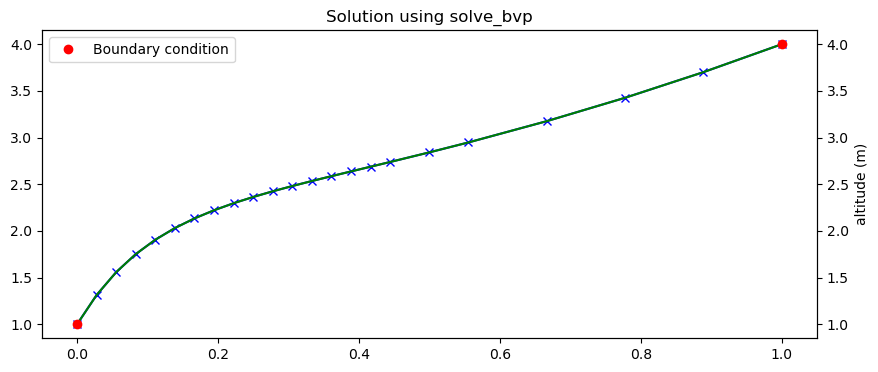

In [65]:
from scipy.integrate import solve_bvp
epsilon=0.1
# Define the differential equations
def fun(t, y):
    return np.vstack((y[1], (-y[1]+2*t+1)/epsilon))

# Define the boundary conditions
def bc(ya, yb):
    return np.array([ya[0]-1, yb[0] - 4])

# Initial guess for the solution
t_guess = np.linspace(0, 1, 10)
y_guess = np.zeros((2, t_guess.size))
#y_guess[1] =   # Initial guess for y'

# Solve the BVP
sol_bvp = solve_bvp(fun, bc, t_guess, y_guess)

# Plot the solution
plt.figure(figsize=(10, 4))
plt.plot(sol_bvp.x, sol_bvp.y[0], 'bx-',label='solve_bvp solution')
plt.plot(sol_bvp.x, f_exact(sol_bvp.x,epsilon), 'g-',label='exact solution')
ax2 = plt.twinx()
sol_diff=sol_bvp.y[0] - f_exact(sol_bvp.x, epsilon)
#ax2.plot(sol_bvp.x, sol_diff, 'r--', label='difference')
#ax2.set_ylim([np.min(sol_diff), np.max(sol_diff)])
plt.plot(1, 4, 'ro', label='Boundary condition')
plt.plot(0, 1, 'ro' )
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.legend()
plt.title('Solution using solve_bvp')
plt.show()

Can you plot the error between the exact and numerical solution?

Change $\epsilon$, what do you see? 

Can you plot the error between the exact and numerical solution?

Use our shooting and finite difference method above, will they work? 
